In [126]:
import numpy as np
import torch
from matplotlib import pyplot as plt 
import os
import cv2
from patchify import patchify
from PIL import Image
from sklearn.preprocessing import MinMaxScaler, StandardScaler

### Loading Data 

In [150]:
root_directory = "Semantic segmentation dataset"
patch_size = 256
scaler = MinMaxScaler()

image_dataset = []
for path, subdirs, files in os.walk(root_directory):
    #print(path)
    dirname= path.split(os.path.sep)[-1]
    if dirname == "images":
        images = os.listdir(path)
     #   print(images)
        for i, image_name in enumerate(images):
            if image_name.endswith(".jpg"):
                image = cv2.imread(path+os.path.sep+image_name,cv2.IMREAD_COLOR)
                image_before_crop = image
                image_before_crop = Image.fromarray(image_before_crop)
                SIZE_X = (image.shape[1]//patch_size)*patch_size
                SIZE_Y = (image.shape[0]//patch_size)*patch_size
                image = Image.fromarray(image)
                image_after_crop = image.crop((0,0,SIZE_X,SIZE_Y))
                image = np.array(image_after_crop)

                #Extract patches from each image
                print("Now patchifying image: ",path,"/",image_name)
                patches_img = patchify(image, (patch_size,patch_size,3),step=256)

                for i in range(patches_img.shape[0]):
                    for j in range(patches_img.shape[1]):
                        single_patch_img = patches_img[i,j,:,:].squeeze()
                        #print(single_patch_img.shape[-1])
                        #Use minmaxscaler instead of just dividing by 255. 
                        single_patch_img = scaler.fit_transform(single_patch_img.reshape(-1, single_patch_img.shape[-1])).reshape(single_patch_img.shape)
                        image_dataset.append(single_patch_img)

Now patchifying image:  Semantic segmentation dataset\Tile 1\images / image_part_001.jpg
Now patchifying image:  Semantic segmentation dataset\Tile 1\images / image_part_002.jpg
Now patchifying image:  Semantic segmentation dataset\Tile 1\images / image_part_003.jpg
Now patchifying image:  Semantic segmentation dataset\Tile 1\images / image_part_004.jpg
Now patchifying image:  Semantic segmentation dataset\Tile 1\images / image_part_005.jpg
Now patchifying image:  Semantic segmentation dataset\Tile 1\images / image_part_006.jpg
Now patchifying image:  Semantic segmentation dataset\Tile 1\images / image_part_007.jpg
Now patchifying image:  Semantic segmentation dataset\Tile 1\images / image_part_008.jpg
Now patchifying image:  Semantic segmentation dataset\Tile 1\images / image_part_009.jpg
Now patchifying image:  Semantic segmentation dataset\Tile 2\images / image_part_001.jpg
Now patchifying image:  Semantic segmentation dataset\Tile 2\images / image_part_002.jpg
Now patchifying image

Mask Dataset

In [176]:
mask_dataset = []  
for path, subdirs, files in os.walk(root_directory):
    #print(path)  
    dirname = path.split(os.path.sep)[-1]
    if dirname == 'masks':   #Find all 'images' directories
        masks = os.listdir(path)  #List of all image names in this subdirectory
        for i, mask_name in enumerate(masks):  
            if mask_name.endswith(".png"):   #Only read png images... (masks in this dataset)
               
                mask = cv2.imread(path+"/"+mask_name, 1)  #Read each image as Grey (or color but remember to map each color to an integer)
                mask = cv2.cvtColor(mask,cv2.COLOR_BGR2RGB)
                SIZE_X = (mask.shape[1]//patch_size)*patch_size #Nearest size divisible by our patch size
                SIZE_Y = (mask.shape[0]//patch_size)*patch_size #Nearest size divisible by our patch size
                mask = Image.fromarray(mask)
                mask = mask.crop((0 ,0, SIZE_X, SIZE_Y))  #Crop from top left corner
                #mask = mask.resize((SIZE_X, SIZE_Y))  #Try not to resize for semantic segmentation
                mask = np.array(mask)             
       
                #Extract patches from each image
                print("Now patchifying mask:", path+"/"+mask_name)
                patches_mask = patchify(mask, (patch_size, patch_size, 3), step=patch_size)  #Step=256 for 256 patches means no overlap
        
                for i in range(patches_mask.shape[0]):
                    for j in range(patches_mask.shape[1]):
                        
                        single_patch_mask = patches_mask[i,j,:,:]
                        #single_patch_img = (single_patch_img.astype('float32')) / 255. #No need to scale masks, but you can do it if you want
                        single_patch_mask = single_patch_mask[0] #Drop the extra unecessary dimension that patchify adds.                               
                        mask_dataset.append(single_patch_mask) 

Now patchifying mask: Semantic segmentation dataset\Tile 1\masks/image_part_001.png
Now patchifying mask: Semantic segmentation dataset\Tile 1\masks/image_part_002.png
Now patchifying mask: Semantic segmentation dataset\Tile 1\masks/image_part_003.png
Now patchifying mask: Semantic segmentation dataset\Tile 1\masks/image_part_004.png
Now patchifying mask: Semantic segmentation dataset\Tile 1\masks/image_part_005.png
Now patchifying mask: Semantic segmentation dataset\Tile 1\masks/image_part_006.png
Now patchifying mask: Semantic segmentation dataset\Tile 1\masks/image_part_007.png
Now patchifying mask: Semantic segmentation dataset\Tile 1\masks/image_part_008.png
Now patchifying mask: Semantic segmentation dataset\Tile 1\masks/image_part_009.png
Now patchifying mask: Semantic segmentation dataset\Tile 2\masks/image_part_001.png
Now patchifying mask: Semantic segmentation dataset\Tile 2\masks/image_part_002.png
Now patchifying mask: Semantic segmentation dataset\Tile 2\masks/image_part_

In [178]:
image_dataset = np.array(image_dataset)
mask_dataset =  np.array(mask_dataset)
image_dataset.shape,mask_dataset.shape

((1305, 256, 256, 3), (1305, 256, 256, 3))

Image Generation for Chechk

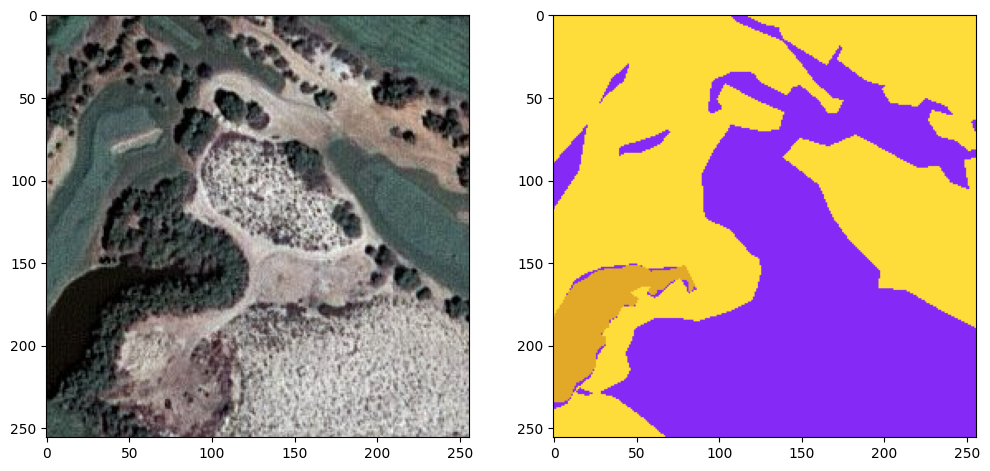

In [191]:
import random
image_number = random.randint(0, len(image_dataset))
plt.figure(figsize=(12, 6))
plt.subplot(121)
print()
plt.imshow(np.reshape(image_dataset[image_number], (patch_size, patch_size, 3)))
plt.subplot(122)
plt.imshow(np.reshape(mask_dataset[image_number], (patch_size, patch_size, 3)))
plt.show()

Pathcing

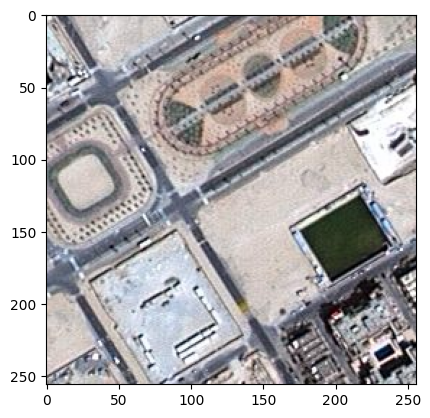

In [148]:
patches_img
plt.imshow(patches_img[2,1].squeeze())

Crop

Text(0.5, 1.0, 'Image After Crop')

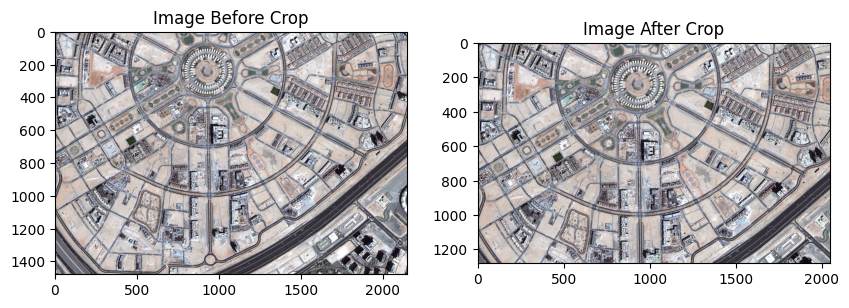

In [61]:
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
plt.imshow(image_before_crop)
plt.title("Image Before Crop")
plt.subplot(1,2,2)
plt.imshow(image_after_crop)
plt.title("Image After Crop")